# PCA

In [ ]:
import pandas as pd
import numpy as np
import pickle
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
sns.set()

In [ ]:
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

### Data 

In [ ]:
triplets_train = pd.read_csv('triplets_train_sample.csv')

In [ ]:
songs = pd.read_csv('songs.csv')

In [ ]:
songs_sub = songs[['track_id','song_id','title','artist_name']]

In [ ]:
data = pd.merge(triplets_train,songs_sub,on='song_id',how='left')
data.head()

,user_id,song_id,play_count,track_id,title,artist_name
0,41536eb0847ad7aa746a29d81367be6bc9f676fd,SOVGSEL12A8C141591,13,TRBJRQN128F4298744,Blind,Lifehouse
1,350e7d679291614f8678a77c17c5fa790721b7d2,SOUOHQI12A8C14224C,5,TRHKHDX128F92E389C,The KGB (Intro),Binary Star
2,c79500b697b2397307870c83c70b4cbad1bdf508,SOUQJDY12A6701D2EF,6,TRVYVZB128E0787D3D,True Faith,New Order
3,8fcd26be76c160e14e1555079b7bd0075ddbe5f8,SOVXTZF12A670207D2,5,TRUZQFC128E0785D6F,The Widow,The Mars Volta
4,51737e957624c4dd888ae6ea6cd066754e43553f,SODNDDS12AB017F3D1,31,TRTLTDW128F930AAB3,The Voiceless,And So I Watch You from Afar


In [ ]:
genre = pd.read_csv('track_genre.txt',sep='\t',header=None)
genre.columns = ["track_id", "genre"]

In [ ]:
songs_sub = pd.merge(songs_sub,genre,on='track_id',how='left')
songs_sub

,track_id,song_id,title,artist_name,genre
0,TRRIQAP128E07845D3,SOZXGJK12A6701D913,School Spirit Skit 1,Kanye West,Hip_Hop_Rap
1,TRUEGXP128F92F7E6D,SOYIUDO12AB01838F5,Say You Will,Kanye West,NaN
2,TRPQDHV128E07845CB,SOWZAHB12AF72A4B46,Graduation Day,Kanye West,Hip_Hop_Rap
3,TRVZCPR128E0791599,SOUXNNU12A67020A48,Hey Mama,Kanye West,Hip_Hop_Rap
4,TRDDQBD128F428CDB4,SOUXFVB12A8C1416D5,Late,Kanye West,Hip_Hop_Rap
...,...,...,...,...,...
384541,TRRFHVE12903CD475C,SOAAFKX12AB01855CE,Bad Motherfucker,Rude Awaking,NaN
384542,TRXANHP128F9310245,SOAAERW12AB0183A37,Ganesh Sound,David S. Ware Quartet,NaN
384543,TRFKWJW12903CD3E3F,SOAAEFC12AB01852F1,De Tongbreker (Tineke Schouten & Linda de Mol),Tineke Schouten,NaN
384544,TRNGYKL128F423CD16,SOAADKA12A8AE48100,Palabras De Gasolina,La Cabra Mecanica,NaN


In [ ]:
zero_point = songs_sub[songs_sub['song_id']=='SOVGSEL12A8C141591']
zero_point

,track_id,song_id,title,artist_name,genre
3476,TRBJRQN128F4298744,SOVGSEL12A8C141591,Blind,Lifehouse,Metal_Alternative


### PCA

In [ ]:
user_id_mapping = {id:i for i, id in enumerate(data['user_id'].unique())}
song_id_mapping = {id:i for i, id in enumerate(data['song_id'].unique())}
users = len(user_id_mapping) 
songs = len(song_id_mapping) 
print(users)
print(songs)

41892
21840


In [ ]:
#with open('wmf_item_lf.pkl', 'rb') as f:
#    model = pickle.load(f)

In [ ]:
weights = pd.read_csv('wmf_item_lf.csv')
weights

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.983668,0.590218,0.526862,-0.932682,-0.472938,-0.790341,0.149103,-0.416349,1.007262,0.497702,...,-0.711940,-0.944510,-0.790847,-0.273091,-0.986511,0.005625,0.887228,-0.981561,-0.983872,0.725210
1,0.763533,0.469904,-0.179333,0.409263,-0.430876,0.523628,0.629299,-0.385354,0.008776,0.104749,...,0.131182,-0.263226,-0.482793,-0.131851,-0.494343,0.504059,0.052185,-0.078598,0.051603,-0.424786
2,-0.034202,0.295470,-0.445377,-0.440322,-0.066218,-0.484994,-0.335106,-0.212458,-0.397691,0.384157,...,-0.121345,-0.309124,0.409007,0.180709,-0.078861,-0.575715,-0.032718,0.095885,-0.722485,0.279316
3,0.027560,0.476024,0.359470,-0.512852,0.992378,0.662982,0.097839,0.328056,0.882467,-0.963645,...,0.988203,-0.990983,-0.093764,-1.001572,0.333425,-0.928431,0.956595,0.934441,-0.969974,0.548505
4,0.213258,-0.164102,-0.230282,-0.402277,0.430589,-0.194747,0.261715,0.568275,0.060200,-0.866012,...,-0.447608,-0.708556,0.583006,0.917283,-0.163971,-0.313290,0.218610,0.581558,-0.510596,0.423151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12921,0.030126,-0.077884,-0.038633,-0.010146,-0.046061,0.031338,-0.083591,-0.032783,0.028978,-0.009882,...,-0.004424,-0.022671,-0.048855,-0.077312,-0.087430,0.048404,0.006652,0.018025,0.042541,0.045748
12922,0.020461,0.010087,0.008516,-0.026173,0.026593,0.022338,0.007339,0.011491,-0.017268,-0.026230,...,-0.029547,-0.016319,0.007371,-0.017388,0.006412,-0.023827,-0.003119,-0.001783,0.028181,-0.018863
12923,-0.062259,-0.103128,0.077649,0.230470,0.125662,0.164983,0.125248,-0.270934,-0.107984,0.193140,...,0.057427,0.037826,-0.252456,0.090314,0.178868,-0.042791,-0.208018,0.220838,0.266475,0.129650
12924,0.023290,0.039513,-0.044015,-0.049678,0.029549,0.069040,0.070189,0.079738,-0.052602,0.114706,...,0.022452,-0.104230,0.036660,-0.067889,-0.070884,0.047275,-0.050273,-0.062480,0.107806,-0.033753


In [ ]:
weights.values

array([[ 0.9836684 ,  0.5902181 ,  0.52686185, ..., -0.9815614 ,
        -0.98387176,  0.72520983],
       [ 0.7635328 ,  0.46990433, -0.17933278, ..., -0.07859823,
         0.05160266, -0.42478582],
       [-0.03420182,  0.29546976, -0.4453767 , ...,  0.09588509,
        -0.7224849 ,  0.2793164 ],
       ...,
       [-0.0622592 , -0.10312826,  0.07764932, ...,  0.22083822,
         0.26647475,  0.12965026],
       [ 0.02329011,  0.03951306, -0.04401533, ..., -0.06247974,
         0.10780611, -0.03375343],
       [ 0.4119628 ,  0.47249582,  0.60667896, ...,  0.22712772,
         0.5662048 , -0.5700842 ]])

In [ ]:
pca = PCA(n_components = 3)
pca.fit(weights)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
data = pca.explained_variance_ratio_

In [ ]:
text = []
for i in data:
    text.append("{0:.0%}".format(i))

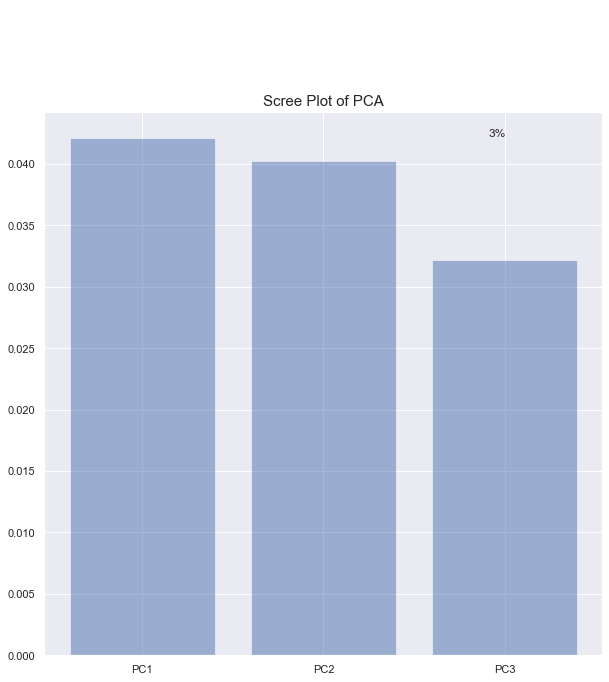

In [ ]:
objects = ('PC1', 'PC2', 'PC3')
fig, ax = plt.subplots(figsize=(10,10))
y_pos = np.arange(len(objects))
ax.bar(y_pos, data, align='center', alpha=0.5)

text = []
for i in data:
    text.append("{0:.0%}".format(i))
    
for i, txt in enumerate(text):
    ax.annotate(txt, (i-0.09, data[i]+0.01),fontsize = 12)
plt.xticks(y_pos, objects)

plt.title('Scree Plot of PCA',fontsize = 15)

plt.show()

In [ ]:
pca_samples = pca.transform(weights)
ps = pd.DataFrame(pca_samples)
ps

,0,1,2
0,0.920713,-0.331938,-1.074284
1,-0.304272,0.922614,-0.635244
2,-0.283977,-0.389543,0.129061
3,0.234596,-0.379312,-0.309894
4,-0.123679,-0.385102,-0.273851
...,...,...,...
12921,-0.470509,-0.248619,-0.168777
12922,-0.480589,-0.281037,-0.162055
12923,-0.412210,-0.254278,-0.022300
12924,-0.502428,-0.214994,-0.136023


In [ ]:
def get_key(val): 
    for key, value in song_id_mapping.items(): 
         if val == value: 
                return key

In [ ]:
def get_song(ind):
    lis = []
    for i in ind['PC_index']:
        lis.append(get_key(i))
    result = pd.DataFrame(lis).set_index(0).join(songs_sub.set_index('song_id')).reset_index()
    result = result.rename(columns={0: "song_id"})
    return result

In [ ]:
def top10(pc_n):
    pcvalue = pd.DataFrame(ps[pc_n].nlargest(10)).reset_index()
    pcvalue = pcvalue.rename(columns={"index": "PC_index", pc_n: "PC value"})
    others = get_song(pcvalue).reset_index()
    others = others.rename(columns={0: "movie_id"})
    result = pd.concat([pcvalue,others], axis=1,sort = False).drop(columns=['index'])
    return result
def bottom10(pc_n):
    pcvalue = pd.DataFrame(ps[pc_n].nsmallest(10)).reset_index()
    pcvalue = pcvalue.rename(columns={"index": "PC_index", pc_n: "PC value"})
    others = get_song(pcvalue).reset_index()
    others = others.rename(columns={0: "movie_id"})
    result = pd.concat([pcvalue,others], axis=1,sort = False).drop(columns=['index'])
    return result

In [ ]:
TOP10PC1 = top10(0)[['title','artist_name','genre']]
TOP10PC1

,title,artist_name,genre
0,Guiding Light,Muse,Experimental
1,Alhos Verdes,GNR,NaN
2,Sun It Rises,Fleet Foxes,Rock_College
3,Tuyo Siempre,Rosario,Pop_Latin
4,Way Away,Yellowcard,Rock_Neo_Psychedelia
5,Falling Inside The Black (Album Version),Skillet,Rock_Alternative
6,Me Pregunto,Belanova,Pop_Contemporary
7,Let Me Be Myself,3 Doors Down,Metal_Alternative
8,Somebody Hates Me,Reel Big Fish,Metal_Alternative
9,Valentine,Justice,Electronica


In [ ]:
TOP10PC2 = top10(1)[['title','artist_name','genre']]
TOP10PC2

,title,artist_name,genre
0,Sarah Yellin',3 Doors Down,Metal_Alternative
1,Fool,Donavon Frankenreiter,Rock_College
2,Time Bomb,Iration,Reggae
3,Miracle,Cascada,Dance
4,Eternal Flame (Single Version),Atomic Kitten,Pop_Contemporary
5,(They Long To Be) Close To You,Carpenters,NaN
6,Wherever You Will Go,The Calling,Metal_Alternative
7,Corner Store,Brazilian Girls,Electronica
8,I Don't Wanna Be,LMFAO,Dance
9,Polite Dance Song,the bird and the bee,Pop_Indie


In [ ]:
BOTTOM10PC1 = bottom10(0)[['title','artist_name','genre']]
BOTTOM10PC1

,title,artist_name,genre
0,If You're Bored (Album Version),Bayside,Grunge_Emo
1,Petit Bois,Silvain Vanot,NaN
2,Family Values,Johnossi,Pop_Indie
3,Steamworks,The Presets,Electronica
4,Deeper,Delirious?,Gospel
5,Vino Tinto,Estopa,Pop_Contemporary
6,Shattered By Broken Dreams,Avenged Sevenfold,Metal_Alternative
7,PG,Saul Williams,Hip_Hop_Rap
8,Never_ Never Gonna Give Ya Up,Barry White,RnB_Soul
9,Dickhead,Kate Nash,Pop_Indie


### Visualize Top50 songs similar to the top recommendation

In [ ]:
matrix_test = weights[['0','1','2','3','4','5','6','7','8','9']]
matrix_test

,0,1,2,3,4,5,6,7,8,9
0,0.983668,0.590218,0.526862,-0.932682,-0.472938,-0.790341,0.149103,-0.416349,1.007262,0.497702
1,0.763533,0.469904,-0.179333,0.409263,-0.430876,0.523628,0.629299,-0.385354,0.008776,0.104749
2,-0.034202,0.295470,-0.445377,-0.440322,-0.066218,-0.484994,-0.335106,-0.212458,-0.397691,0.384157
3,0.027560,0.476024,0.359470,-0.512852,0.992378,0.662982,0.097839,0.328056,0.882467,-0.963645
4,0.213258,-0.164102,-0.230282,-0.402277,0.430589,-0.194747,0.261715,0.568275,0.060200,-0.866012
...,...,...,...,...,...,...,...,...,...,...
12921,0.030126,-0.077884,-0.038633,-0.010146,-0.046061,0.031338,-0.083591,-0.032783,0.028978,-0.009882
12922,0.020461,0.010087,0.008516,-0.026173,0.026593,0.022338,0.007339,0.011491,-0.017268,-0.026230
12923,-0.062259,-0.103128,0.077649,0.230470,0.125662,0.164983,0.125248,-0.270934,-0.107984,0.193140
12924,0.023290,0.039513,-0.044015,-0.049678,0.029549,0.069040,0.070189,0.079738,-0.052602,0.114706


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity = cosine_similarity(matrix_test.values)
similarity -= np.eye(similarity.shape[0])

In [ ]:
# User index for recommendation
item_index = 0

# Number of similar users for recommendation
n_recommendation = 10

# Plot top n recommendations
n_plot = 10

# Sort similar users by index
similarity_item_index = np.argsort(similarity[item_index])[::-1]
# Sort similar users by score
similarity_item_score = np.sort(similarity[item_index])[::-1]

In [ ]:
#50 neighbors of item 0 (index)
similarity_item_index

array([ 1307, 11253,  2019, ...,  4165,  8490,  7874], dtype=int64)

In [ ]:
def findkey(value,dic):
    for i in dic.keys():
        if dic[i]==value:
            return i

In [ ]:
song_rec = []
for index in similarity_item_index:
    song_rec.append(findkey(index,song_id_mapping))
song_rec

['SOUNKHZ12AF72A037D',
 'SORMGZD12A8C143618',
 'SOXAAST12AB018306A',
 'SOEBYTE12A8C14389C',
 'SOENEXU12A8C13FB57',
 'SOACGAQ12A58A79805',
 'SOWYRZV12AF72A23E6',
 'SOQGKRX12A6D4F872F',
 'SOCPHII12A81C21FE1',
 'SODMRBV12AF72A03BB',
 'SORHRXC12AB01818B1',
 'SOWHUJD12A8C133C9A',
 'SODCZGO12A6310E918',
 'SOJDKCB12A8C141267',
 'SOUGNXG12AC4687118',
 'SOVXHKC12A8C13B03F',
 'SOHVOWI12A8C140E2F',
 'SOTGHAO12AB0183D03',
 'SOBLIPF12AF729F53E',
 'SOPSHPT12A8C136DF6',
 'SORIQQA12AB017DE38',
 'SOOVMGK12A8C13D994',
 'SOHESRV12A67ADE815',
 'SOZRMEF12AB017CD03',
 'SOLLSQR12AB0180A99',
 'SOSAZTX12A67ADBEE0',
 'SOUHWSV12A8AE4936A',
 'SOWNAQE12A6D4FA814',
 'SOXKYYM12B34F1C5C9',
 'SOFAMFF12A6D4F8D5F',
 'SOIZSCS12A67021572',
 'SOWLZPO12A670215C3',
 'SOIJWHG12A8C134063',
 'SOFVHLF12A8C140E48',
 'SOFDRJB12A6701F3B4',
 'SOKKCHJ12B0B806780',
 'SOLPDCL12A58A79B9A',
 'SOQJLWB12A6701E7B3',
 'SOIRLDI12A6D4FA5FA',
 'SOGDVCL12AB0185EC2',
 'SOVJUYC12AB018079C',
 'SOPYRES12A6D4F5DD0',
 'SOYQQAC12A6D4FD59E',
 'SOHFKYE12

In [ ]:
top50songs = ps[ps.index.isin(similarity_item_index[:50])]
top50songs

,0,1,2
19,0.876816,0.106421,-0.322522
25,1.786951,-0.384420,-0.434214
239,1.942433,0.298987,-0.144197
534,0.653688,0.270398,-0.546955
614,1.249382,-0.522834,-0.271950
640,0.809412,-0.301914,-1.314221
810,2.023187,-0.557136,-0.624168
1113,1.383513,0.904779,-0.686334
1307,0.963595,-0.605859,-1.061487
1493,1.756979,-0.168558,-1.013277


In [ ]:
###### Prepare the data for plotting ##########
tocluster = pd.DataFrame(top50songs[[0,1,2]])

tocluster['song_index'] = tocluster.index
tocluster['song_id'] = tocluster['song_index'].apply(lambda ii: findkey(ii,song_id_mapping))

tocluster = tocluster.set_index('song_id').join(songs_sub.set_index('song_id'))

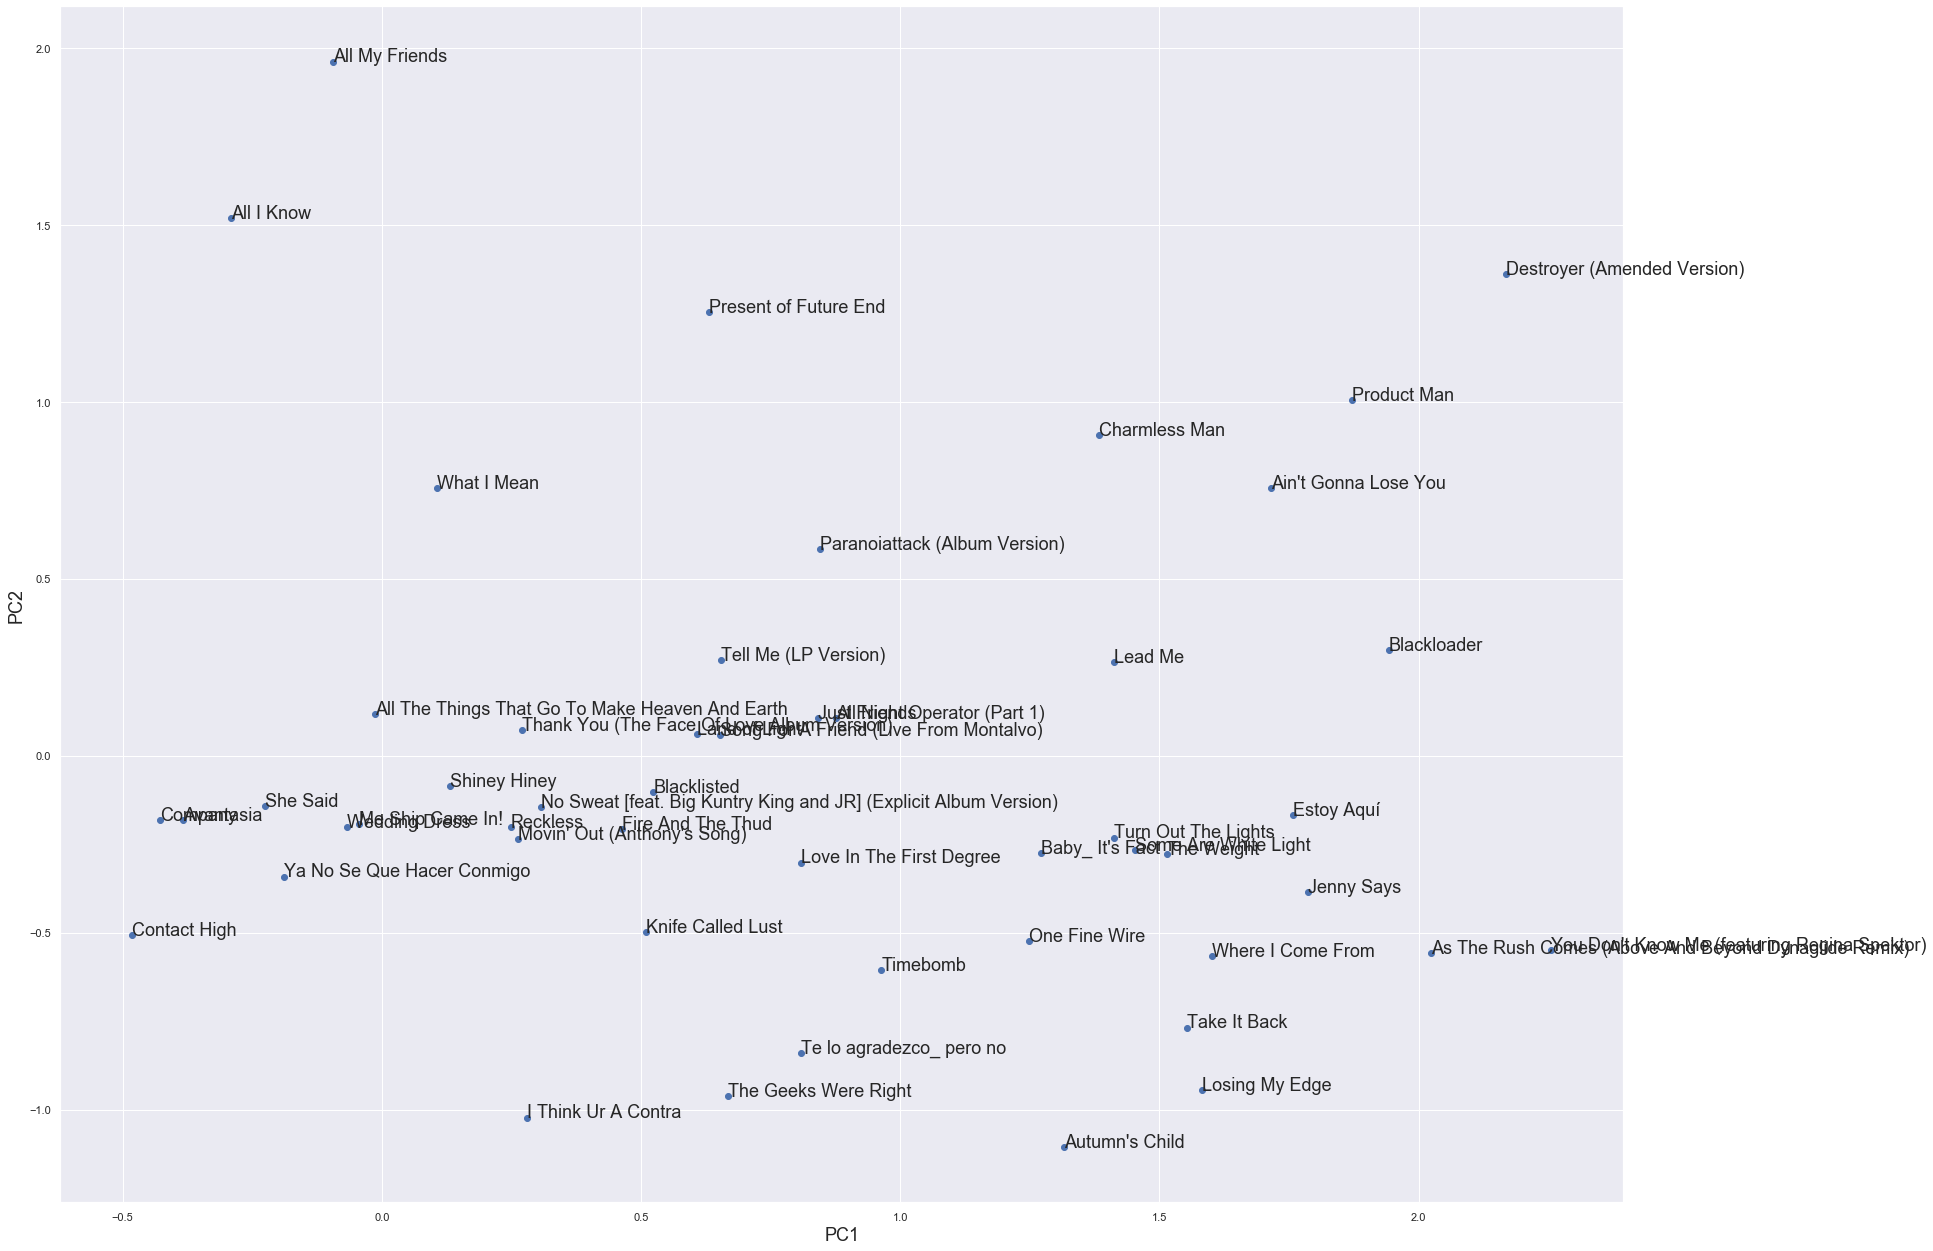

In [ ]:
fig, ax = plt.subplots(figsize=(28,22))
ax.scatter(tocluster[0], tocluster[1])

ax.set_ylabel('PC2', fontsize = 18) 
ax.set_xlabel('PC1', fontsize = 18)

for i, txt in enumerate(tocluster['title']):
    ax.annotate(txt, (tocluster[0].iloc[i], tocluster[1].iloc[i]),fontsize = 18)

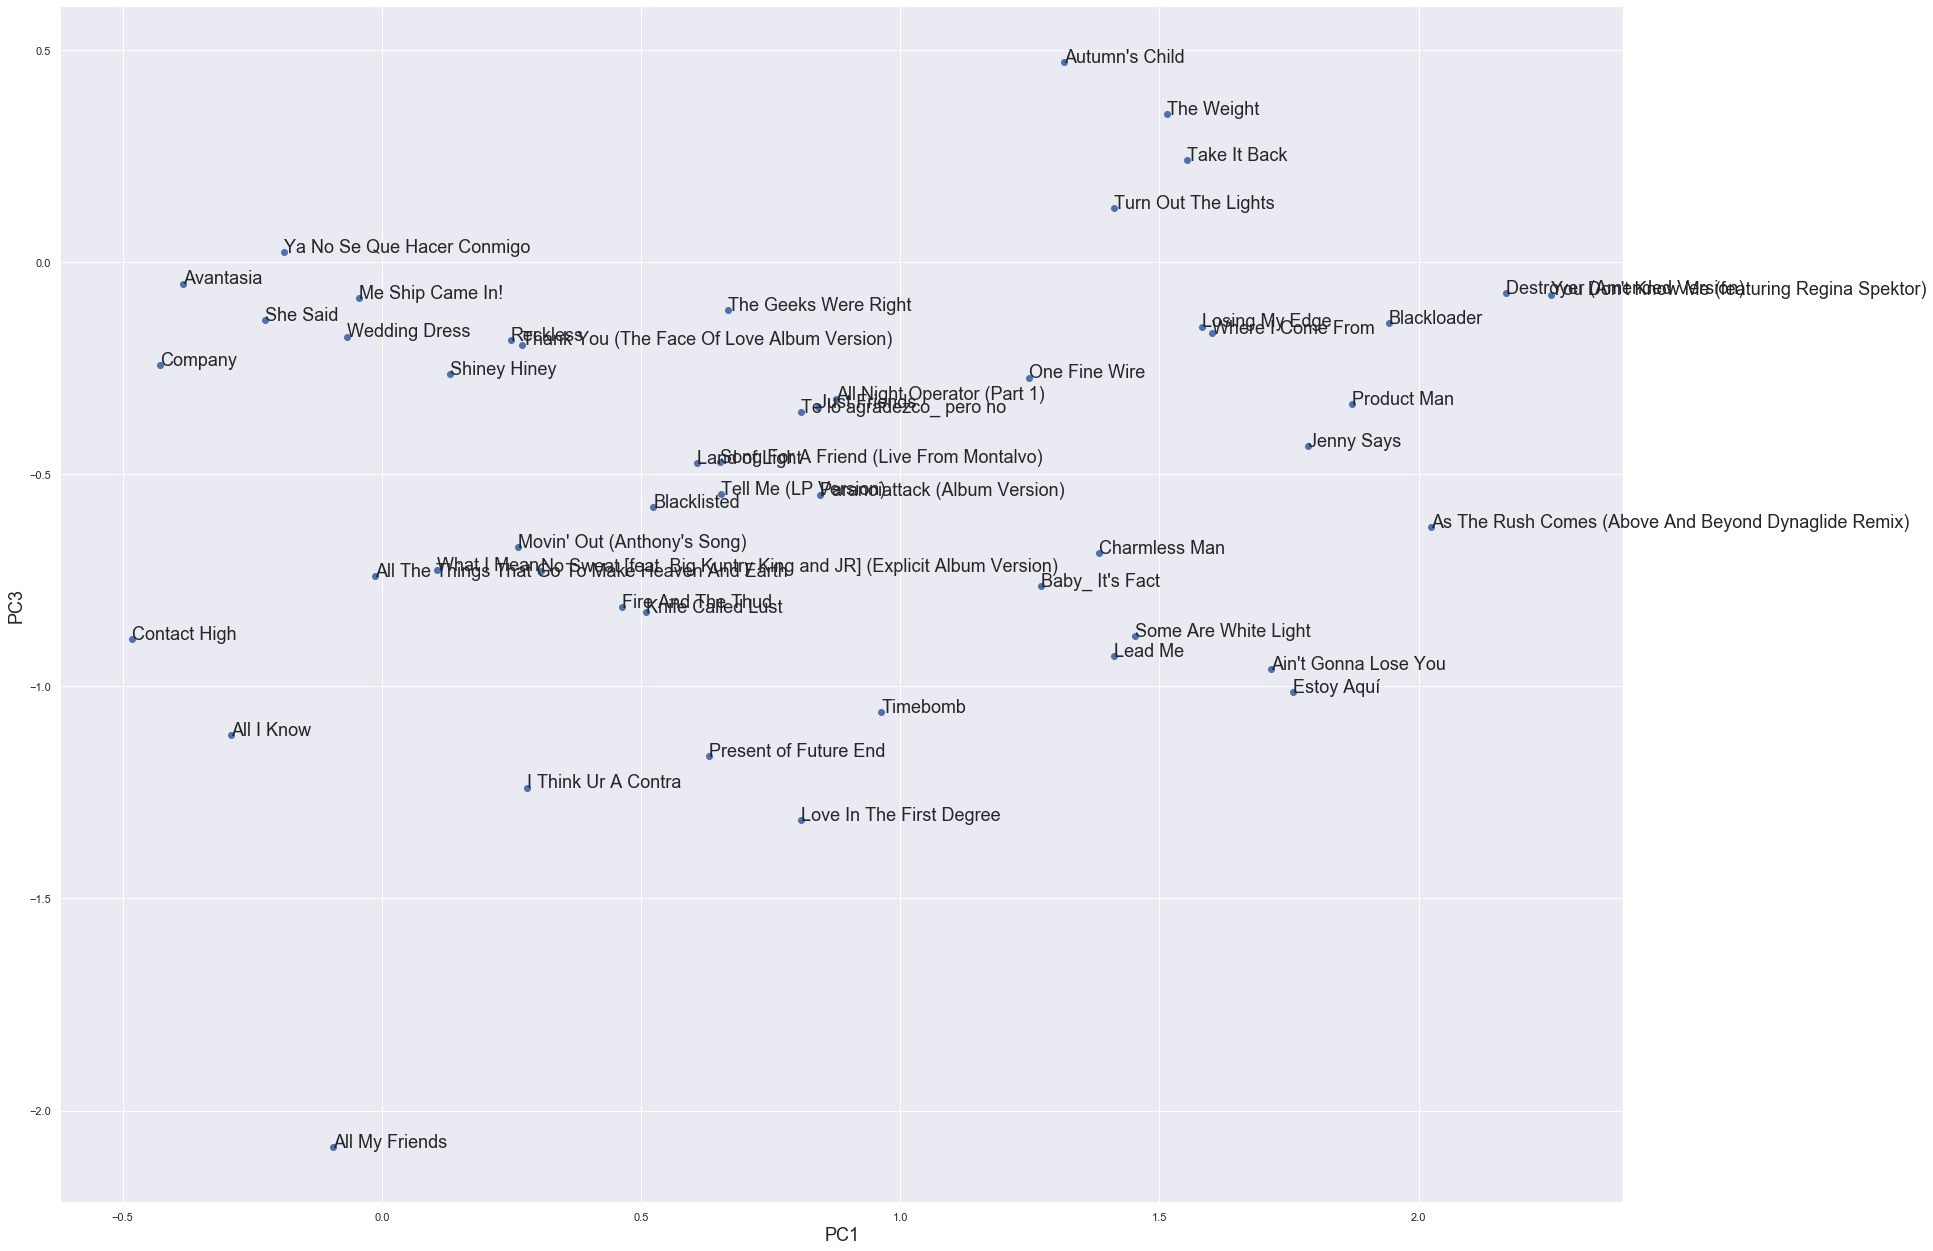

In [ ]:
fig, ax = plt.subplots(figsize=(28,22))
ax.scatter(tocluster[0], tocluster[2])
#ax.set_title('v = 1',fontweight="bold", size=18) # Title
ax.set_ylabel('PC3', fontsize = 18) # Y label
ax.set_xlabel('PC1', fontsize = 18)
for i, txt in enumerate(tocluster['title']):
    ax.annotate(txt, (tocluster[0].iloc[i], tocluster[2].iloc[i]),fontsize = 18)

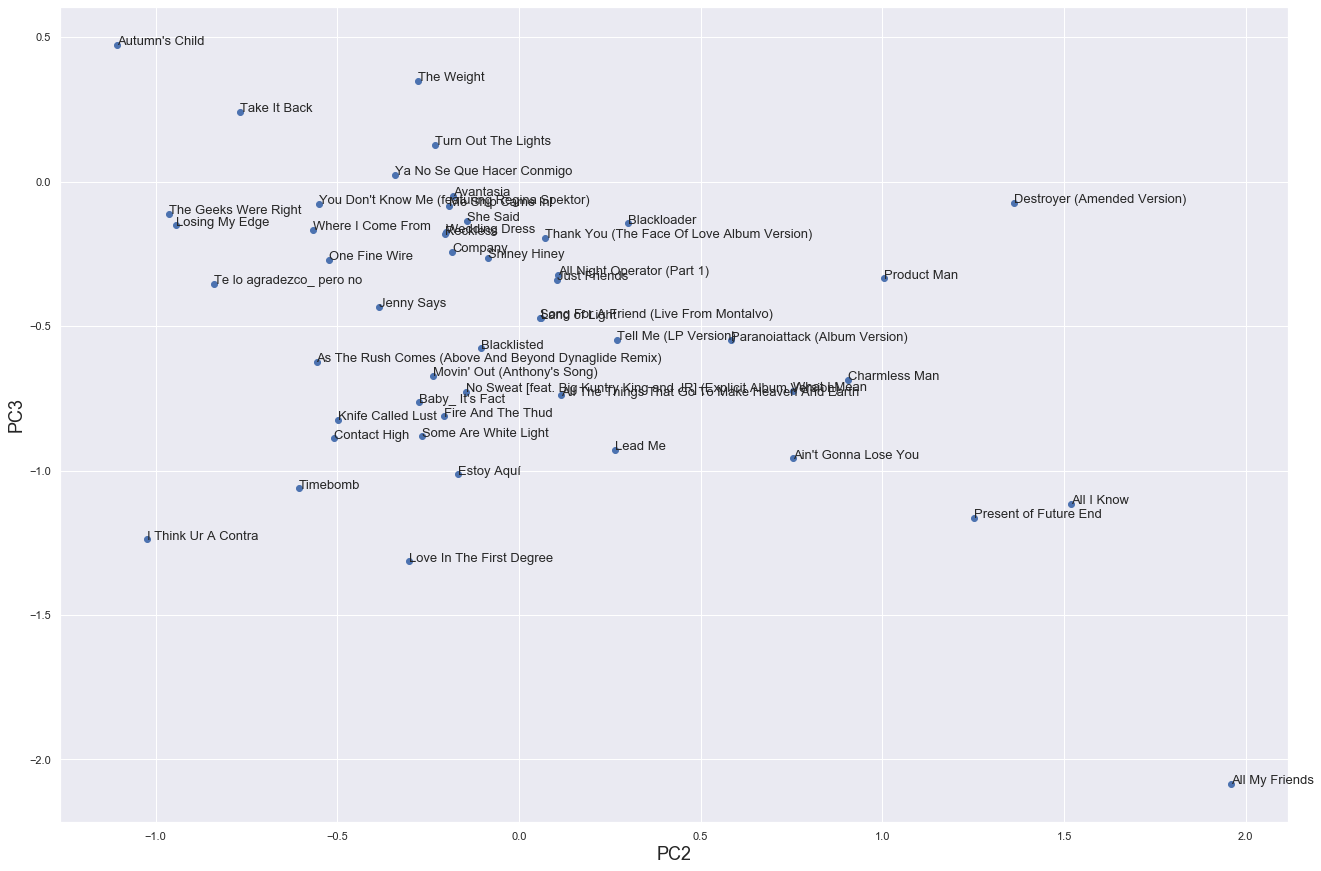

In [ ]:
fig, ax = plt.subplots(figsize=(22,15))
ax.scatter(tocluster[1], tocluster[2])
#ax.set_title('v = 1',fontweight="bold", size=18) # Title
ax.set_ylabel('PC3', fontsize = 18) # Y label
ax.set_xlabel('PC2', fontsize = 18)
for i, txt in enumerate(tocluster['title']):
    ax.annotate(txt, (tocluster[1].iloc[i], tocluster[2].iloc[i]),fontsize = 13)

In [ ]:
tocluster['text'] = tocluster.apply(lambda x: str(x.iloc[5])+' - '+str(x.iloc[6])+' - '+(str(x.iloc[7])),axis=1)

In [ ]:
fig = go.Figure(data=go.Scatter(x=tocluster[0],
                                y=tocluster[1],
                                mode='markers',
                                text=tocluster['text'])) # hover text goes here

In [ ]:
fig.update_layout(title='PC1 and PC2')
fig.show()

In [ ]:
fig2 = go.Figure(data=go.Scatter(x=tocluster[1],
                                y=tocluster[2],
                                mode='markers',
                                text=tocluster['text'])) # hover text goes here

fig2.update_layout(title='PC2 and PC3')
fig2.show()

In [ ]:
import plotly.express as px

fig = px.scatter_3d(tocluster, x=0,y=1,z=2,text = tocluster['title'],hover_name=tocluster['text'])

fig.show()